In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combined_df= pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
mice = combined_df["Mouse ID"].unique()
drugs = combined_df["Drug Regimen"].unique()
time = combined_df["Timepoint"].unique()

num_mouse = len(mice)
num_drugs = len(drugs)
num_measurements = len(time)
num_samples = num_drugs * num_measurements

data_summary = pd.DataFrame({"Number of Mice": [num_mouse],
                         "Number of Drug Regimen Treatments": [num_drugs],
                         "Number of Time Measurements": [num_measurements],
                         "Number of Samples": [num_samples]})

mean= pd.DataFrame(round(combined_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
mean = mean.rename(columns={"Tumor Volume (mm3)":"Mean"})

median = pd.DataFrame(round(combined_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
median= median.rename(columns={"Tumor Volume (mm3)":"Median"})

variance = pd.DataFrame(round(combined_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
variance = variance.rename(columns={"Tumor Volume (mm3)":"Variance"})

stdev = pd.DataFrame(round(combined_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
stdev = stdev.rename(columns={"Tumor Volume (mm3)":"StDev"})

SEM = pd.DataFrame(round(combined_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))
SEM = SEM.rename(columns={"Tumor Volume (mm3)":"SEM"})

summary = [mean, median, variance, stdev, SEM]
summary = pd.concat(summary,axis=1,join='inner')
summary

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


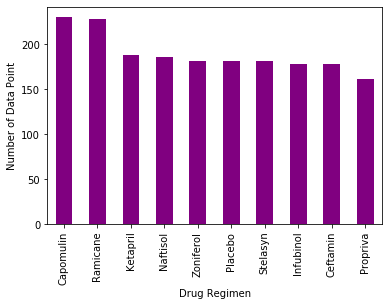

In [4]:
treatment = combined_df["Drug Regimen"].value_counts()
treatment_bar_graph = treatment.plot(kind="bar", facecolor="purple")

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Point')

treatment_bar_graph

In [5]:
treatments = combined_df["Drug Regimen"].value_counts()
treatments

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

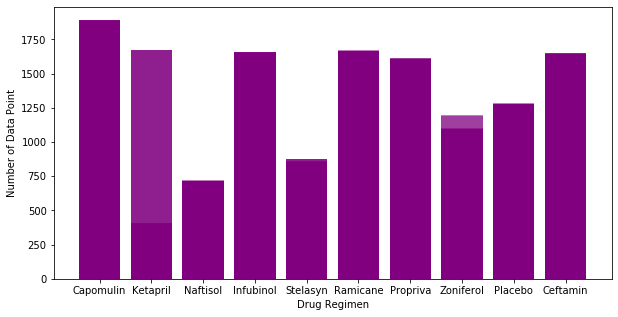

In [6]:
x_axis = np.arange(len(combined_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,5))
plt.bar(combined_df["Drug Regimen"], x_axis, color='purple', alpha=0.5, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Point')
plt.show()

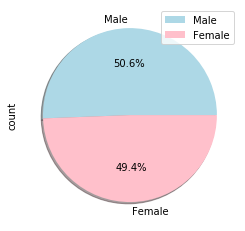

In [7]:
gender= pd.DataFrame(combined_df["Sex"].value_counts())
gender_df = pd.DataFrame({'count':[958,935]},
                   index = ['Male', 'Female'])
pie_chart = gender_df.plot.pie(y='count', figsize=(4, 4),autopct="%1.1f%%", shadow=True,colors = ['lightblue', 'pink'] )


C:\Users\stacy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x1b00944b7c8>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

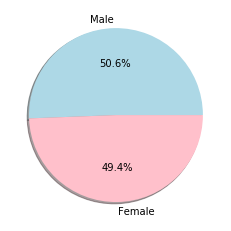

In [8]:
gender = pd.DataFrame(combined_df["Sex"].value_counts())
labels = ["Male", "Female"]
explode = (0,0)
plt.pie(gender, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True,colors = ['lightblue', 'pink'] )